In [ ]:
# sys tools
import sys
import time
import argparse

# data tools
import h5py
import zarr
import numpy as np
import numba as nb

# custom tools
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/utils/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/Analog_BC/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/Analog_BC/utils/')

import data_utils as du
import analog_utils as ana

In [2]:
sys.path.insert(0, '/glade/u/home/ksha/PUBLISH/WFRT-PP-DEV/')
from namelist_casper import * 

In [3]:
import pygrib

In [8]:
# graph tools
import cmaps
import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [4]:
# importing domain information
with h5py.File(save_dir+'BC_domain_info.hdf', 'r') as h5io:
#     print(h5io.keys())
#     base_lat = h5io['base_lat'][...]
#     base_lon = h5io['base_lon'][...]
    lat_bc = h5io['bc_lat'][...] # lats of the BC domain
    lon_bc = h5io['bc_lon'][...] # lons of the BC domain
#     land_mask = h5io['land_mask_base'][...]
    land_mask_bc = h5io['land_mask_bc'][...] # selecting OCEAN grids from the BC domain

ocean_mask_bc = np.logical_not(land_mask_bc) # selecting LAND grids from the BC domain

In [5]:
# # importing domain information
# with h5py.File(save_dir+'BC_domain_info.hdf', 'r') as h5io:
#     print(h5io.keys())
#     base_lat = h5io['base_lat'][...]
#     base_lon = h5io['base_lon'][...]
#     lat_bc = h5io['bc_lat'][...] # lats of the BC domain
#     lon_bc = h5io['bc_lon'][...] # lons of the BC domain
#     land_mask = h5io['land_mask_base'][...]
#     land_mask_bc = h5io['land_mask_bc'][...] # selecting OCEAN grids from the BC domain

# bc_in_base = np.ones(land_mask.shape).astype(bool)
# bc_in_base[bc_inds[0]:bc_inds[1], bc_inds[2]:bc_inds[3]] = land_mask_bc

# # subsetting by land mask
# bc_shape = land_mask_bc.shape
# grid_shape = land_mask.shape
# IND_bc = []
# for i in range(grid_shape[0]):
#     for j in range(grid_shape[1]):
#         if ~bc_in_base[i, j]:
#             IND_bc.append([i, j])
            
# IND_bc = np.array(IND_bc, dtype=np.int)
# N_grids = len(IND_bc)

In [7]:
GEFS_dir = '/glade/scratch/ksha/DATA/GEFS/20220114/geavg.t00z.pgrb2s.0p25.f012'

with pygrib.open(GEFS_dir) as grb_io:
    #
    grb_reader_apcp = grb_io.select(name='Total Precipitation')[0]
    apcp, _, _ = grb_reader_apcp.data(lat1=48.25, lat2=60.00, lon1=-141.0+360, lon2=-113.25+360)
    apcp = np.flipud(apcp) # GEFS default: kg/m**-2 (or mm)
    
    #
    grb_reader_pwat = grb_io.select(name='Precipitable water')[0]
    pwat, _, _ = grb_reader_pwat.data(lat1=48.25, lat2=60.00, lon1=-141.0+360, lon2=-113.25+360)
    pwat = np.flipud(pwat) # GEFS default: kg/m**-2 (or mm)

In [13]:
apcp_flat = apcp[ocean_mask_bc]
pwat_flat = apcp[ocean_mask_bc]

**Visualization check**

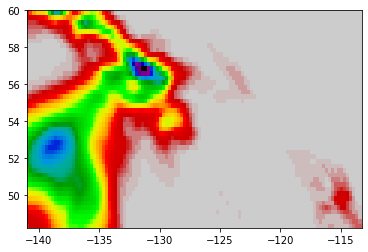

In [11]:
plt.pcolormesh(lon_bc, lat_bc, apcp, cmap=plt.cm.nipy_spectral_r)

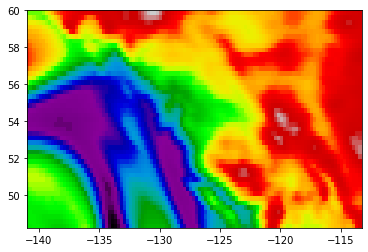

In [12]:
plt.pcolormesh(lon_bc, lat_bc, pwat, cmap=plt.cm.nipy_spectral_r)